**Github Issues** : https://github.com/bnoi/cell-tracker/issues/new

#### Initialize everything

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pdb

Automatic pdb calling has been turned ON


In [3]:
### The library used for plotting
#%matplotlib 
import matplotlib.pyplot as plt

%matplotlib qt
#mpld3.enable_notebook()

### This imports various dependencies
%run nb_init.py

#### 
import cell_tracker as ct


2015-03-05 07:52:59:INFO:sktracker.utils.mpl_loader: Matplotlib backend 'Qt4Agg' has been loaded.
:0: FutureWarning: IPython widgets are experimental and may change in the future.


# 1. Data loading and preparation

## 1.1 Pick the directory and get the relevant data

Here you can pick either a TIFF or a `.h5` file or an excel file

In [4]:
## You can set this to the common path of all your data
default_path = '/media/data/AnneHDFStores/'
#cluster = ct.ui.get_cluster(default_path)#, extra_sheet=2)

In [84]:
all_clusters = {}

for i in range(0,18, 2):
    trajs = pd.read_excel('/media/data/AnneHDFStores/20150305/ROCKinhib trajectories.xlsx', i)
    metadata = pd.read_excel('/media/data/AnneHDFStores/20150305/ROCKinhib trajectories.xlsx', i+1)
    metadata = {name :value for name,  value
                in zip(metadata['Name'], metadata['Value'])}
    store_path = ''.join(['/media/data/AnneHDFStores/20150305/', metadata['FileName'], '.h5'])
    oio = ct.io.ObjectsIO(metadata=metadata, store_path=store_path)
    cluster = ct.CellCluster(oio)
    
    trajs.t_stamp = trajs.t_stamp.astype(np.int)
    #trajs.label = trajs.label.astype(np.int)
    trajs.set_index(['t_stamp', 'label'],
                    inplace=True)
    cluster.trajs = Trajectories(trajs.dropna().sortlevel())
    
    #cluster.center = cluster.trajs.xs('center', level='label')
    cluster.get_center(center_label='center') #trajs = cluster.trajs.drop('center', level='label')
    cluster.trajs.drop('center', level='label', inplace=True)

    cluster.oio['trajs'] = cluster.trajs
    print(store_path)
    all_clusters[metadata['FileName']] = cluster
    try:
        cluster.cumulative_angle()
    except:
        print('Failed for {}'.format(metadata['FileName']))
    cluster.save_trajs()


/media/data/AnneHDFStores/20150305/140913-ROCKRNAi-1.h5
/media/data/AnneHDFStores/20150305/140913-ROCKRNAi-2.h5
/media/data/AnneHDFStores/20150305/130813-ROCKRNAi-1.h5
/media/data/AnneHDFStores/20150305/130813-ROCKRNAi-2.h5
/media/data/AnneHDFStores/20150305/140813-ROCKRNAi-1.h5
/media/data/AnneHDFStores/20150305/140813-ROCKRNAi-2.h5
/media/data/AnneHDFStores/20150305/160813-ROCKRNAi-2.h5
/media/data/AnneHDFStores/20150305/190813-ROCKRNAi-2.h5
/media/data/AnneHDFStores/20150305/190813-ROCKRNAi-2.h5


In [85]:
cluster = all_clusters['190813-ROCKRNAi-2']

In [88]:
for cluster in all_clusters.values():
    cluster.trajs['theta'].to_csv(cluster.stackio.store_path.replace('.h5', '.csv'))

#### Set metadata

In [92]:
cluster.trajs[['t', 'theta']].to_excel(cluster.stackio.store_path.replace('.h5', '.xlsx'))

AttributeError: 'Series' object has no attribute 'to_excel'

> /home/guillaume/anaconda/envs/python3/lib/python3.4/site-packages/pandas/core/generic.py(1947)__getattr__()
   1946             raise AttributeError("'%s' object has no attribute '%s'" %
-> 1947                                  (type(self).__name__, name))
   1948 

ipdb> c


In [12]:
from sktracker import data

In [5]:
smw = ct.ui.set_metadata(cluster.metadata)
display.display(smw)

## 1.2 Scaling and basic computations

In the cell below, if you change `True` to `False`, the scale of the data will be changed form pixels to microns.

**Change the value bellow ONLY if you haven't scaled the data before**

In [58]:
cluster.was_scaled = True ### Set this to False 
####if you need to scale the data to physical size

#### Basic computations

In [6]:
cluster.relative_pos = cluster.oio['extra']


In [7]:
cluster.relative_pos.columns = ['t_stamp', 'pos_in_chamber']

In [8]:
if not cluster.was_scaled:
    cluster.scale_pix_to_physical()

### Computes the position of the nuclei with respect to the cluster center
cluster.get_center(smooth=10, reset=True, save_droped='bck')

### Computes the angle of the nuclei with respect to the cluster center
cluster.cumulative_angle()

### Save the trajectories to the .h5 file
cluster.save_trajs()
print('''Trajectories for this experiment are stored in the file {}'''.format(cluster.oio.store_path))

Trajectories for this experiment are stored in the file /media/data/AnneHDFStores/Guillaume_220914/WT-240812.h5


In [13]:
cluster.trajs

x          y     z    t        x_c         y_c  \
t_stamp label                                                           
1       1       66.75750   49.98750   9.0    0  62.384554   42.909864   
        2       57.56625   50.47125   7.5    0  62.384554   42.909864   
        3       60.79125   32.41125   6.0    0  62.384554   42.909864   
        4       64.82250   40.63500   6.0    0  62.384554   42.909864   
        5       61.43625   41.60250   6.0    0  62.384554   42.909864   
2       1       65.95125   51.60000   7.5    3  62.781796   43.484943   
        2       60.14625   49.34250   7.5    3  62.781796   43.484943   
        3       62.88750   33.05625   6.0    3  62.781796   43.484943   
        4       66.43500   41.92500   6.0    3  62.781796   43.484943   
        5       59.66250   40.15125   6.0    3  62.781796   43.484943   
3       1       67.08000   53.69625   7.5    6  63.889423   44.980560   
        2       60.95250   50.95500   9.0    6  63.889423   44.980560   
        3       63.85500   35.79750   6.0    6  63.889423   44.980560   
        4       69.17625   45.31125   6.0    6  63.889423   44.980560   
        5       58.69500   39.34500   6.0    6  63.889423   44.980560   
4       1       69.01500   56.76000   7.5    9  64.683935   46.763567   
        2       61.59750   52.40625   7.5    9  64.683935   46.763567   
        3       64.50000   37.57125   6.0    9  64.683935   46.763567   
        4       68.04750   47.08500   6.0    9  64.683935   46.763567   
        5       58.37250   41.60250   6.0    9  64.683935   46.763567   
5       1       68.69250   58.05000   6.0   12  65.248033   48.365850   
        2       62.24250   53.69625   7.5   12  65.248033   48.365850   
        3       66.75750   38.21625   6.0   12  65.248033   48.365850   
        4       69.82125   48.05250   6.0   12  65.248033   48.365850   
        5       58.85625   42.08625   6.0   12  65.248033   48.365850   
6       1       68.69250   61.59750   9.0   15  65.975786   49.979424   
        2       63.53250   54.50250   7.5   15  65.975786   49.979424   
        3       68.04750   41.28000   6.0   15  65.975786   49.979424   
        4       70.95000   49.34250   6.0   15  65.975786   49.979424   
        5       61.27500   44.50500   6.0   15  65.975786   49.979424   
...                  ...        ...   ...  ...        ...         ...   
30      1       84.81750   85.14000   7.5   87  90.129571   93.688755   
        2       85.14000   84.65625   7.5   87  90.129571   93.688755   
        3       94.17000  100.94250   7.5   87  90.129571   93.688755   
        4       83.20500   92.55750   4.5   87  90.129571   93.688755   
        5      101.42625  102.71625   9.0   87  90.129571   93.688755   
31      1       86.59125   91.10625   9.0   90  91.799867   96.644973   
        2       86.10750   90.30000   9.0   90  91.799867   96.644973   
        3       97.71750  100.94250   6.0   90  91.799867   96.644973   
        4       84.49500   97.39500   4.5   90  91.799867   96.644973   
        5      105.45750  104.00625   9.0   90  91.799867   96.644973   
32      1       87.23625   94.49250   9.0   93  93.102835   99.853606   
        2       86.59125   94.81500   6.0   93  93.102835   99.853606   
        3      100.78125  105.29625   7.5   93  93.102835   99.853606   
        4       87.39750  101.26500   4.5   93  93.102835   99.853606   
        5      105.29625  105.78000   9.0   93  93.102835   99.853606   
33      1       87.23625   95.78250   3.0   96  94.495154  103.030645   
        2       88.36500   96.26625   6.0   96  94.495154  103.030645   
        3      101.42625  107.07000   9.0   96  94.495154  103.030645   
        4       90.30000  105.13500   4.5   96  94.495154  103.030645   
        5      103.36125  108.03750  10.5   96  94.495154  103.030645   
34      1       89.33250  100.94250   7.5   99  96.497405  106.144267   
        2       89.81625  100.29750   6.0   99  96.497405  106.144267   
        

In [14]:
cluster.trajs.to_csv(cluster.oio.store_path.replace('.h5', '_all.csv'))

#### Each nucleus trajectory is represented by a segment

In [93]:
## This means that we go over all the segments
## contained in the cluster trajectories
colors = cluster.trajs.get_colors()
segments = cluster.trajs.get_segments()
for label, segment in cluster.trajs.iter_segments:
    print('Segment with label {} has {} time points and has color code {}'
          .format(label, segment.shape[0], colors[label]))

Segment with label 1 has 61 time points and has color code #FF00AC
Segment with label 2 has 61 time points and has color code #FF0000
Segment with label 3 has 61 time points and has color code #00FFA9


In [94]:
import os

In [95]:

sampling = 1
smooth = 1

corr_window = 6


interp = cluster.trajs.time_interpolate(sampling=sampling, s=0)
measure_pool = pd.DataFrame(index=interp.index)
cluster.get_center(reset=True, save_droped='interpolated', trajs=interp)

centered = Trajectories(interp[['x_r', 'y_r', 'z_r', 't']].values,
                        index=interp.index, columns=['x', 'y', 'z', 't'])

rotated, pca = transformation.do_pca(interp, return_pca=True)
rotated = Trajectories(rotated).time_interpolate(sampling=1, s=0)

measure_pool['forward_speed'] = rotated['v_x'] * np.sign(rotated['v_x'].mean())
sld_dir = translation.sld_dir(rotated, window=6)
measure_pool['sld_dir'] = sld_dir.sld_dir * np.sign(rotated['v_x'].mean())

corrs = correlation.crosscorel(rotated, 'x', window=corr_window)
correlation_pool = corrs.copy()

centered = centered.time_interpolate(sampling=1, s=0)
measure_pool['dir_shift'] = rotation.dir_shift(interp, shift=3, 
                                               coords=['v_x', 'v_y', 'v_z']).dir_shift

rotated_centered, pca = transformation.do_pca(centered, return_pca=True)
rotated_centered = Trajectories(rotated_centered).time_interpolate(sampling=1, s=0)

polar = rotation.get_polar_coords(rotated_centered)
corrs = correlation.crosscorel(polar, 'theta', window=corr_window)
for col in corrs.columns:
    correlation_pool[col] = corrs[col]


r_speeds = rotation.radial_speed(polar, smooth=0).sortlevel(['t_stamp', 'label'])
r_speeds['ratio'] = np.abs(r_speeds['v_orad'])/np.hypot(r_speeds['v_rad'], r_speeds['v_orad'])
for col in r_speeds.columns:
    measure_pool[col] = r_speeds[col]
measure_pool['v_theta'] = measure_pool['v_theta'] * np.sign(measure_pool['v_theta'].mean())

name = os.path.basename(cluster.oio.store_path).split('.')[0]
measure_pool['name'] = name
correlation_pool['name'] = name


ValueError:     Error on input data

> /home/guillaume/anaconda/envs/python3/lib/python3.4/site-packages/scipy/interpolate/fitpack.py(517)splrep()
    516             except KeyError:
--> 517                 raise _iermess['unknown'][1](_iermess['unknown'][0])
    518     if full_output:

ipdb> c


In [123]:
def sld_auto_cor_(segment, window, coord):
    all_cors = []
    t_stamps = segment.index.get_level_values('t_stamp')
    for t_stamp in t_stamps[window//2:-window//2]:
        data = segment.loc[t_stamp-window//2:t_stamp+window//2]
        cor = np.correlate(data[coord], data[coord], mode='full')
        all_cors.append(cor.mean()/ cor.max())
    return np.array(all_cors)

In [124]:
all_cors = sld_auto_cor_(r_speeds.xs(1, level='label'), window=8, coord='v_theta')

In [125]:
all_cors.shape

(27,)

In [126]:
fig, ax = plt.subplots()

ax.plot(r_speeds.xs(1, level='label')['v_theta'])
ax.plot(all_cors)


In [52]:
def plot_autocor(polar, name, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    cor = np.correlate(polar.xs(1, level='label')['theta'],
                       polar.xs(1, level='label')['theta'], mode='same')
    ax.plot(cor[cor.shape[0]//2:]/cor.max(), label=name)
    plt.draw()
    return cor, ax

In [66]:
cor, ax = plot_autocor(polar, name, ax=ax)
ax.legend()

# 2. Basic ploting functionalities

## 2.1 Plot the coordinates versus time

In [16]:
axes = draw.plot_stacked_coords(cluster.trajs, coords=['x', 'y'], text=True)#, 'z'])

It is also possible to access a single segment

## 2.2 Plot a single segment (x versus y)

In [17]:
segments = cluster.trajs.get_segments() 
### We access a segment by giving it's label
seg0 = segments[2]

fig, ax = plt.subplots()
ax.plot(seg0.x_r, seg0.y_r, 'k-');

ax.set_xlabel('x position')
ax.set_xlabel('y position')

## 2.3 Positions against time relative to the cluster center

When we computed the center position, we created new columns in the data
the position of the center is given by `x_c, y_c, z_c`, and the positions
of the nuclei relative to the center by `x_r, y_r, z_r`.

In [12]:
axes = draw.plot_stacked_coords(cluster.trajs,
                                coords=['x_r', 'y_r'])#, 'z_r'])

## 2.4 Positions in 3D (absolute positions)

#### All in the same graph

In [13]:

### The coordinates to plot
coords=['x', 'y', 'z']

### Get the colors of the different trajectories
colors = cluster.trajs.get_colors()

### Get all the segments
segments = cluster.trajs.get_segments()

### The code below puts a all the trajectories on the same graph
axes, ax_3d = None, None
for label in cluster.trajs.labels:
    segment = segments[label]
    scatter_kw = {'c':segment.t.astype(np.float),
                  'cmap':'spectral',
                  's':40,
                  'alpha':0.8,
                  'edgecolors':'none'}
    line_kw = {'c':'gray',#tracker.label_colors[label],
               'ls':'-',
               'alpha':0.8, 'lw':0.75}

    axes, ax_3d = draw.show_4panels(cluster.trajs, label,
                                    axes=axes, ax_3d=ax_3d,
                                    scatter_kw=scatter_kw,
                                    line_kw=line_kw,
                                    coords=coords)


#### A single nucleus

In [14]:
### Choose the label
label = 1

### The coordinates to plot
coords=['x', 'y', 'z']


segment = segments[label]
scatter_kw = {'c':segment.t.astype(np.float),
              'cmap':'spectral',
              's':40,
              'alpha':0.8,
              'edgecolors':'none'}
line_kw = {'c':'gray',#tracker.label_colors[label],
           'ls':'-',
           'alpha':0.8, 'lw':0.75}


axes, ax_3d = draw.show_4panels(cluster.trajs, label,
                                axes=None, ax_3d=None,
                                scatter_kw=scatter_kw,
                                line_kw=line_kw,
                                coords=coords)


## 2.5 Positions in 3D relative to cluster center

In [15]:
### Choose the label
label = 5

### Get the colors of the different trajectories
colors = cluster.trajs.get_colors()

### The coordinates to plot
coords=['x_r', 'y_r', 'z_r']

segment = segments[label]
scatter_kw = {'c':segment.t.astype(np.float),
              'cmap':'spectral',
              's':40,
              'alpha':0.8,
              'edgecolors':'none'}
line_kw = {'c':'gray',#tracker.label_colors[label],
           'ls':'-',
           'alpha':0.8, 'lw':0.75}


axes, ax_3d = draw.show_4panels(cluster.trajs, label,
                                axes=None, ax_3d=None,
                                scatter_kw=scatter_kw,
                                line_kw=line_kw,
                                coords=coords)


# 3. Ellipses and rotation detection

## 3.1 Fit ellipses of different sizes over the trajectories

#### Define the sizes and the fitting method

The sizes of the fitting windows are given in minutes

In [22]:
sizes = np.arange(24, 66, 12)
detection_method = 'polar' ### This must be 'polar' or 'cartesian'p


#### Do the computation

In [17]:
reset_ellipses = False

### Fits ellipses and detect rotations
### This might take some time
for size in sizes:
    if not reset_ellipses:
        break
    print('Computing for a window of {} min'.format(size))
    cluster.compute_ellipticity(size, method=detection_method)

## 3.2 Rotation detection

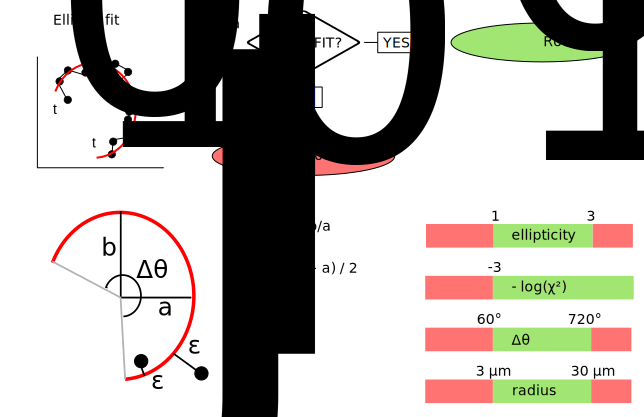

In [29]:
display.SVG('ellipsis_detection.svg')

### 3.2.1 Setting rotation detection cutoffs

In [19]:
### You can change the name of the file bellow if you're using other cutoffs
settings_json = 'ellipsis_cutoffs.json'

setter_widget = ct.ui.ipy_widgets.set_ellipsis_limits(jsonfile=settings_json)
ellipsis_cutoffs = setter_widget.settings
display.display(setter_widget)

### 3.2.2 Detection (redo if you change the cutoffs)

In [23]:
cluster.detect_rotations(ellipsis_cutoffs, sizes, method='binary')

### 3.2.3 Plot rotation events

In [24]:
ct.graphics.show_ellipses_clusters(cluster, sizes, ellipsis_cutoffs)
ax, total_rot, n_detected = ct.graphics.plot_rotation_events(cluster, ax=None,
                                                             show_segments=True)

### 3.2.4  Save the rotation index to a `csv` file

In [22]:
csv_fname = cluster.oio.store_path.replace('.h5', '_rotation_index.csv')
total_rot.to_csv(csv_fname)
print('Rotation index saved to {}'.format(csv_fname))

Rotation index saved to /media/data/AnneHDFStores/jnk_inhib_iono_rotation_index.csv


### 3.2.3 Basic stats on the rotation index

In [23]:
### If you want to compute the rotation index average between
### two stacks, set here the number of the first and last ones
start_frame = 1
end_frame = 7

print('Average value of the rotation index between frame {} and {}:'.format(start_frame, end_frame))
print('\t {0:.3f}'.format(total_rot.loc[start_frame: end_frame].mean()))

print('Global average of the rotation index: ')
print('\t {0:.3f}'.format(total_rot.mean()))

Average value of the rotation index between frame 1 and 7:
	 0.000
Global average of the rotation index: 
	 0.200


## 3.3 Four panels views of the trajectories and the detected ellipses

#### Single segment

In [24]:
cluster.trajs.labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [26]:


colors = cluster.trajs.get_colors()
segments = cluster.trajs.get_segments()

### Choose the label
label =5


### Grab the corresponding segment
segment = segments[label]

## Paramters for the scatter plot (the bullets) 
scatter_kw = {'c':segment.t.astype(np.float),
              'cmap':'spectral',
              's':40,
              'alpha':0.8,
              'edgecolors':'none'}

## Paramters for the line plot 
line_kw = {'c': 'gray',
           'ls': '-',
           'alpha': 0.8,
           'lw': 0.75}

## Parameters for the ellipses
ellipsis_kw = {'c':'k', 'alpha':1., 'lw':0.5}

axes, ax_3d = ct.graphics.show_4panel_ellipses(cluster,
                                               label,
                                               sizes,
                                               ellipsis_cutoffs,
                                               method=detection_method,
                                               scatter_kw=scatter_kw,
                                               line_kw=line_kw,
                                               show_centers=False,
                                               ellipsis_kw=ellipsis_kw,
                                               axes=None, ax_3d=None)

axes[0, 0].set_xlim(-60, 60)
axes[0, 0].set_ylim(-60, 60)
fig = axes[0, 0].get_figure()
fig.set_size_inches(10, 10)
plt.savefig('/home/guillaume/Bureau/jvm_ctrl_lbl_{}.svg'.format(label))



#### All the segments at once

In [84]:
axes, ax_3d = None, None

### Get segments and their colors 
colors = cluster.trajs.get_colors()
segments = cluster.trajs.get_segments()


for label in cluster.trajs.labels:

    ### Grab the corresponding segment
    segment = segments[label]


    ## Paramters for the scatter plot (the bullets) 
    scatter_kw = {'c':segment.t.astype(np.float),
                  'cmap':'spectral',
                  's':40,
                  'alpha':0.8,
                  'edgecolors':'none'}

    ## Paramters for the line plot 
    line_kw = {'c': 'gray',
               'ls': '-',
               'alpha': 0.8,
               'lw': 0.75}

    ## Parameters for the ellipses
    ellipsis_kw = {'c':'k', 'alpha':0.2, 'lw':0.5}

    axes, ax_3d = ct.graphics.show_4panel_ellipses(cluster,
                                                   label,
                                                   sizes,
                                                   ellipsis_cutoffs,
                                                   scatter_kw=scatter_kw,
                                                   line_kw=line_kw,
                                                   show_centers=True,
                                                   ellipsis_kw=ellipsis_kw,
                                                   axes=axes, ax_3d=ax_3d)


# 4 Rotation and translation quantifications

## 4.1 Interpolation and smoothing

In order to compensate for the noise in the trajectories, we can use spline interpolation to obtain

In [112]:
sampling = 1
smooth = 20

In [113]:
centered = cluster.get_center(append=False, reset=True)

In order to characterize the nuclear motion, we can transform the trajectories in different ways:

1. Interpolation and smoothing

2. Center corrected trajectory, possibly in a polar coordinate system

3. For 3D trajectories, projection of the data along the principal plane, or along another relevant axis



In [114]:
interp = cluster.trajs.time_interpolate(sampling=sampling, s=smooth)
interp_centered = cluster.get_center(trajs=interp, append=False, reset=True)

#
rotated = transformation.do_pca(interp_centered)
rotated = Trajectories(rotated).time_interpolate(sampling=sampling, s=smooth)

polar = rotation.get_polar_coords(rotated, get_dtheta=True)

In [115]:
fig, ax = plt.subplots()
interp.show('x', 'y', ax=ax, marker='+', lw=2, alpha=0.5)
cluster.trajs.show('x', 'y', ax=ax, marker='o')
ax.set_aspect('equal')

## 4.1 Rotation quantification

Bellow are depicted the various quantities we will use to quantify the rotation

In [141]:
fig, ax = plt.subplots()
#ax.plot(cluster.trajs.t.mean(level='t_stamp'),
# cluster.relative_pos.values)
coeffs = {}
ts = cluster.trajs.t.mean(level='t_stamp').values

ax.plot(ts, cluster.relative_pos.values)


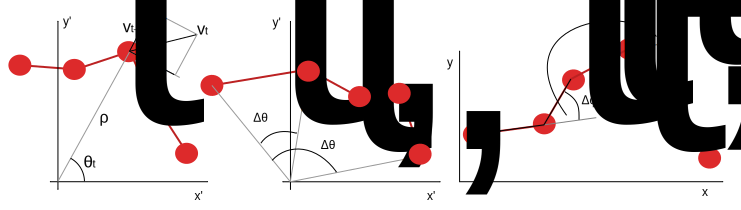

In [116]:
display.SVG('measure_rotation.svg')

### 1. Polar coordiante system

In the first graph, the polar coordinates $\rho$ and $\theta$ are represented. The radius $\rho$ corresponds to the distance of the point to the center of the cluster, and $\theta$ it's angle with respect to the $x'$ axis.



### 2. Radial and ortho radial speeds


### 3. Angle shifts

### 4. Direction shifts


In [117]:
shift = 4
dir_shift = rotation.dir_shift(rotated, shift=shift)
rotation_speeds = rotation.radial_speed(polar)
d_theta = polar.theta.shift(shift) - polar.theta

In [118]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)

colors = cluster.trajs.get_colors()
for label in cluster.trajs.labels:
    c = colors[label]
    rs = rotation_speeds.xs(label, level='label')
    ds = dir_shift.xs(label, level='label')
    pol = polar.xs(label, level='label')
    dt = d_theta.xs(label, level='label')
    axes[0].plot(rs.t, rs.v_rad, '-', c=c, alpha=0.8)
    axes[1].plot(rs.t, rs.v_orad, '-', c=c, alpha=0.8)
    axes[2].plot(ds.t, ds.dir_shift, '-', c=c, alpha=0.8)
    axes[3].plot(pol.t, dt, '-', c=c, alpha=0.8)
    
    
axes[0].plot(rotation_speeds.t.mean(level='t_stamp'),
        rotation_speeds.v_rad.mean(level='t_stamp'),
        'k-', lw=2, alpha=0.8)
axes[0].set_ylabel('Radial speed (µm/min)')

axes[1].plot(rotation_speeds.t.mean(level='t_stamp'),
        rotation_speeds.v_orad.mean(level='t_stamp'),
        'k-', lw=2, alpha=0.8)
axes[1].set_ylabel('Ortho-radial speed (µm/min)')


axes[2].plot(dir_shift.t.mean(level='t_stamp'),
        dir_shift.dir_shift.mean(level='t_stamp'),
        'k-', lw=2, alpha=0.8)
axes[2].set_ylabel('Direction shift (rad)')

axes[3].plot(polar.t.mean(level='t_stamp'),
        d_theta.mean(level='t_stamp'),
        'k-', lw=2, alpha=0.8)
axes[3].set_ylabel('Angle shift (rad)')



axes[0].set_title(cluster.metadata['FileName'])

### Angular correlation

We call $P^\theta_{ij}(t_0, t_1)$ the correlation coefficient between nuclei $i$ and $j$  between time points $t_0$ and t_1$ 

$$
P^\theta_{ij} = \frac{ C^\theta_{ij} } { \sqrt{ C^\theta_{ii} * C^\theta_{jj} } }
$$

The corresponding term $C^\theta_{ij}(t_0, t_1)$ in the covariance matrix .
The covariance matrix is computed as:

$$
C^\theta_{ij} = \frac{1}{N_t}\sum_{t=t_0}^{t_1} (\theta_i(t) - \langle \theta_i \rangle)(\theta_j(t) - \langle \theta_j \rangle)
$$



In [94]:

from sktracker.trajectories.measures import correlation


In [125]:
theta_corrs = correlation.crosscorel(polar, 'theta', 10)

In [131]:
dir_corr = correlation.crosscorel(interp, 'x', 10)

In [134]:
dir_corr.head()

,corr_x,corr_x_stm,t
t_stamp,,,
1,NaN,NaN,1
2,NaN,NaN,2
3,NaN,NaN,3
4,NaN,NaN,4
5,NaN,NaN,5


In [133]:
fig, ax = plt.subplots()
ax.errorbar(dir_corr.t, dir_corr.corr_x, yerr=dir_corr.corr_x_stm)



<Container object of 3 artists>

# 4. Translation detection

## 4.1 Definitions

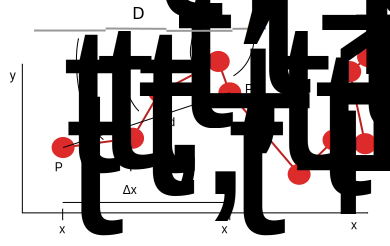

In [126]:
display.SVG('measure_translation.svg')

### Position
Let $P(t) = \left(x(t), y(t), z(t)\right)$ be the position in space of a nuclei at time $t$

### Net displacement

We note $d_{t, t+w}$ the **net displacement** between two time points, that is the distance between those two points, independently of the movement between them:

$$
d_{t, t+w} = ||P_{t, t+w} - P_t||
$$


### Cumulated displacement

For each nuclei, the **cumulated displacement**, between time $t$ and time $t + w$  noted $D(t, t+w)$ is the total distance traveled by a nucleus between $t$ and $t+w$.  It is the sum of the individual displacements between every time point and the next:

$$
D_{t, t+w} = \sum_{i=t+1}^{t+w} ||P_i - P_{i - 1}||
$$

### Processivity

We call processivity the ratio of the apparent displacement with the cumulated displacement for a given window $w$:
$$
\Pi_{t, t+w} = d(t, t+w) / D(t, t+w)
$$


### Directionality

The $x$ axis is defined as the principal axis of the displacement (defined by a principal component analysis computed on the original 3D positions for the whole trajectory).

We define **directionality** as the ratio between the difference of position on the principal axis $x$ and the apparent displacement:

$$
\mbox{dir}_{t, t+w} = \frac{x(t+w) - x(t)}{d_{t, t+w}} = \Delta x_{t, t+w} / d_{t, t+w}
$$

### Cumulated directionality

In this measure, instead of dividing the displacement along $x$ by the apparent displacement, we devide it by the cumulated displacement:

$$
\mbox{dir}^c_{t, t+w} = \frac{x(t+w) - x(t)}{D_{t, t+w}}
$$



### 4.1.2 Do the computations

In [127]:
### Some initialisations
measures = {}

#### For a window of a given size

In [128]:
### Set here the width of the window (in number of frames)
window = 4

processivity =  translation.sld_processivity(interp, window)
directionality =  translation.sld_dir(interp, window)
cum_dir = translation.sld_cum_dir(interp, window)

measures[('processivity', window)] = processivity
measures[('directionality', window)] = directionality
measures[('cumulated directionality', window)] = cum_dir

#### Plotting the resulting curves

In [129]:
import os
name = 'directionality'

measure = measures[(name, window)]
title = '{} : {} \n for a {} minutes window'.format(os.path.basename(cluster.oio.store_path.replace('.h5', '')),
                                                    name, window * cluster.metadata['TimeIncrement'])

ax = ct.graphics.show_measure(interp, measure, ax=None,
                              errorbar=False,
                              show_segments=True,
                              c='k',marker='o',
                              lw=2, alpha=0.6)
ax.set_title(title)
ax.set_ylim(-1, 1)

TypeError: zip argument #2 must support iteration

In [224]:
colors = {'processivity': 'r',
          'directionality': 'b',
          'cumulated directionality': 'g'}

fig, ax = plt.subplots()
for (name, w), measure in measures.items():
    if w != window:
        continue
    label = '{} for a {} minutes window'.format(name, w * cluster.metadata['TimeIncrement'])
    ct.graphics.show_measure(cluster, measure, ax=ax,
                             errorbar=False,
                             show_segments=False,
                             c=colors[name],
                             label=label, lw=2, alpha=0.6)
ax.set_ylim(-1, 1);
ax.legend(loc='lower_left')


#### Statistics

In [ ]:
### If you want to compute the rotation index average between
### two stacks, set here the number of the first and last ones
start_frame = 1
end_frame = 7

for (name, w), measure in measures.items():
    if w!= window:
        continue
    win_size = w * cluster.metadata['TimeIncrement']
    print('Average value of {} between frame {} and {} for a {} minutes window:'
          .format(name, start_frame, end_frame, win_size))
    print('\t {0:.3f}'.format(measure.data.loc[start_frame: end_frame].mean()))

    print('Global average of {} for a {} minutes window: '.format(name, win_size))
    print('\t {0:.3f}'.format(measure.data.mean()))

#### Automated computation for a range of window sizes

In [ ]:
windows = [3, 4, 5, 6, 7]
for window in windows:
    processivity = translation.sld_processivity(cluster, window)
    directionality = translation.sld_dir(cluster, window)
    cum_dir = translation.sld_cum_dir(cluster, window)

    measures[('processivity', window)] = processivity
    measures[('directionality', window)] = directionality
    measures[('cumulated directionality', window)] = cum_dir
    

#### Save the average data for each window to a `csv` file

In [226]:
processivity.dropna().head()

t      data
t_stamp label              
4       0      12  0.973633
        1      12  0.950707
        2      12  0.909554
5       0      15  0.945695
        1      15  0.886933

In [130]:
measures.keys()

dict_keys([('processivity', 4), ('cumulated directionality', 4), ('directionality', 4)])

In [232]:
np.all(np.isfinite(processivity))

False

In [229]:
mean_measures_df = pd.DataFrame.from_dict({key: meas.data.mean(level='t_stamp') for key, meas in measures.items()})
csv_name = cluster.oio.store_path.replace('.h5', 'translation_measures.csv')
mean_measures_df.to_csv(csv_name)
print('Saved measures to ', csv_name)

Saved measures to  /media/data/AnneHDFStores/iono_080613translation_measures.csv


### 4.1.4 Mean Square Displacement

The mean square displacement for a time difference $\Delta t$ is computed as the squared distance between the position of the particle at time $t$ and its position at time $t + \Delta t$ averaged over each successive time $t$:


$$
\begin{aligned}
\mbox{MSD}(\Delta t) &=  \frac{\sum_0^{T - \Delta t} \left(\mathbf{r}(t + \Delta t)  - \mathbf{r}(t) \right)^2}{(T - \Delta t) / \delta t}
\end{aligned}
$$

In [ ]:
MSD = ct.translation.get_MSD(cluster)

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Mean Square Displacement')
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('MSD (µm²)')

for label in cluster.trajs.labels:
        seg_msd = MSD.xs(label, level='label')
        ax.errorbar(seg_msd.Dt, seg_msd.MSD, yerr= seg_msd.MSD_std, alpha=0.4) 

ax.errorbar(MSD.Dt.mean(level='Dt_stamp'),
            MSD.MSD.mean(level='Dt_stamp'), 
            yerr=MSD.MSD_std.mean(level='Dt_stamp'), fmt='k-', lw=2);

#### Exponent of the MSD function

For a purely linear movement, the mean square displacement is growing like $\Delta t^2$, wheras for a purely random walk or Brownian motion, it is growing _linearly_ with time (and the slope of the linear function is proportional to the diffusion coefficient).

Here we compute the exponent $\alpha$ of the MSD function: $\textrm{MSD}(\Delta t) = \Delta t^\alpha$.

It will be 2 for a purely processive motion, and 1 for a purely Brownian motion.

In [ ]:
log_t = np.log(MSD.Dt.mean(level='Dt_stamp'))
log_msd = np.log(MSD.MSD.mean(level='Dt_stamp'))

ps = np.polyfit(log_t[1:10], log_msd[1:10], deg=1,
                w=1/MSD.Dt.mean(level='Dt_stamp').iloc[1:10])

print('Estimated exponent of the mean square displacement:')
print('\t {0:.3f}'.format(ps[0]))


In [ ]:
cluster.save_trajs()
